## Image Processing via SVD

Simple image compression using singular value matrix decomposition

In [48]:
from google.colab import drive
drive.mount("/content/gdrive/")

%cd /content/gdrive/MyDrive/'Colab Notebooks'/'Images'/
%ls

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).
/content/gdrive/MyDrive/Colab Notebooks/Images
city.jpg  flowers.jpg


In [49]:
import numpy as np
from matplotlib import image

# load images as arrays
imgName = input("Image name: ")
img = image.imread(imgName)[:,:,0]

Image name: flowers.jpg


In [ ]:
from matplotlib import pyplot as plt

# display the images
plt.figure(figsize=(8, 6), dpi=1028)
plt.imshow(img, cmap="gray")

(array([  9.,  16.,  21.,  26.,  29.,  36.,  37.,  42.,  45.,  50.,  54.,
         60.,  63.,  68.,  76.,  82.,  88.,  95., 105., 108., 121., 129.,
        139., 147., 155., 164., 166., 172., 163., 152., 130., 105.,  80.,
         55.,  39.,  31.,  21.,  21.,  17.,  13.,  12.,  12.,  10.,   9.,
          8.,   7.,   6.,   8.,   6.,   5.,   4.,   3.,   6.,   4.,   3.,
          3.,   2.,   2.,   2.,   3.,   3.,   1.,   2.,   1.,   1.,   2.,
          1.,   1.,   1.,   1.,   0.,   1.,   2.,   0.,   0.,   1.,   0.,
          0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]), array([-10.18282114, -10.08099293,  -9.97916472,  -9.8773365 ,
         -9.77550829,  -9.67368008,  -9.57185187,  -9.47002366,
         -9.36819545,  -9.26636724,  -9.16453902,  -9.06271081,
         -8.9608826 ,  -8.85905439,  -8.75722618,  -8.65539797,
         -8.55356976,  -8.45174154,  -8.34991333,  -8.24808512,

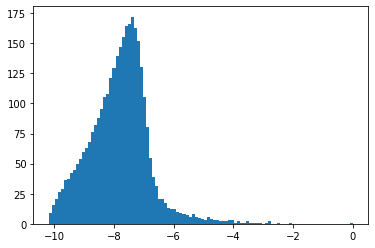

In [51]:
# compute SVD
U,s,Vt=np.linalg.svd(img)

# information contained in image
plt.hist(np.log(s/s[0]),bins=100)           

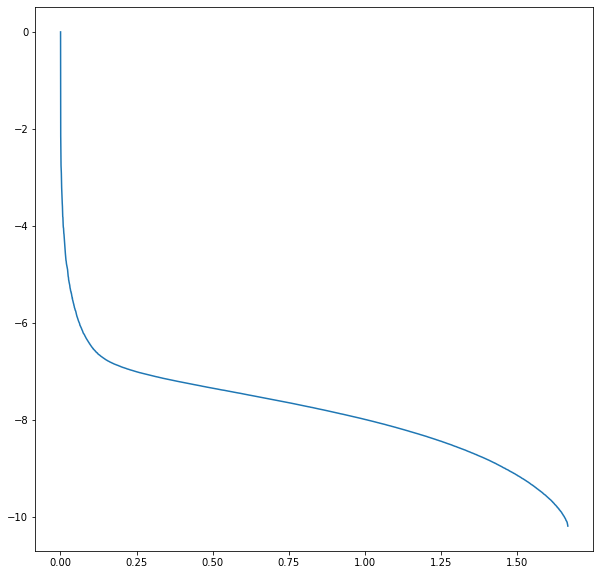

In [52]:
# log-normalized distributions of singular values vs the normalized compression rates
sdata=np.linspace(1,len(s),num=len(s))*(img.shape[0]+img.shape[1])/(img.shape[0]*img.shape[1])

plt.figure(figsize=(10, 10))
plt.plot(sdata,np.log(s/s[0]))

Number of singular values for compression: 50


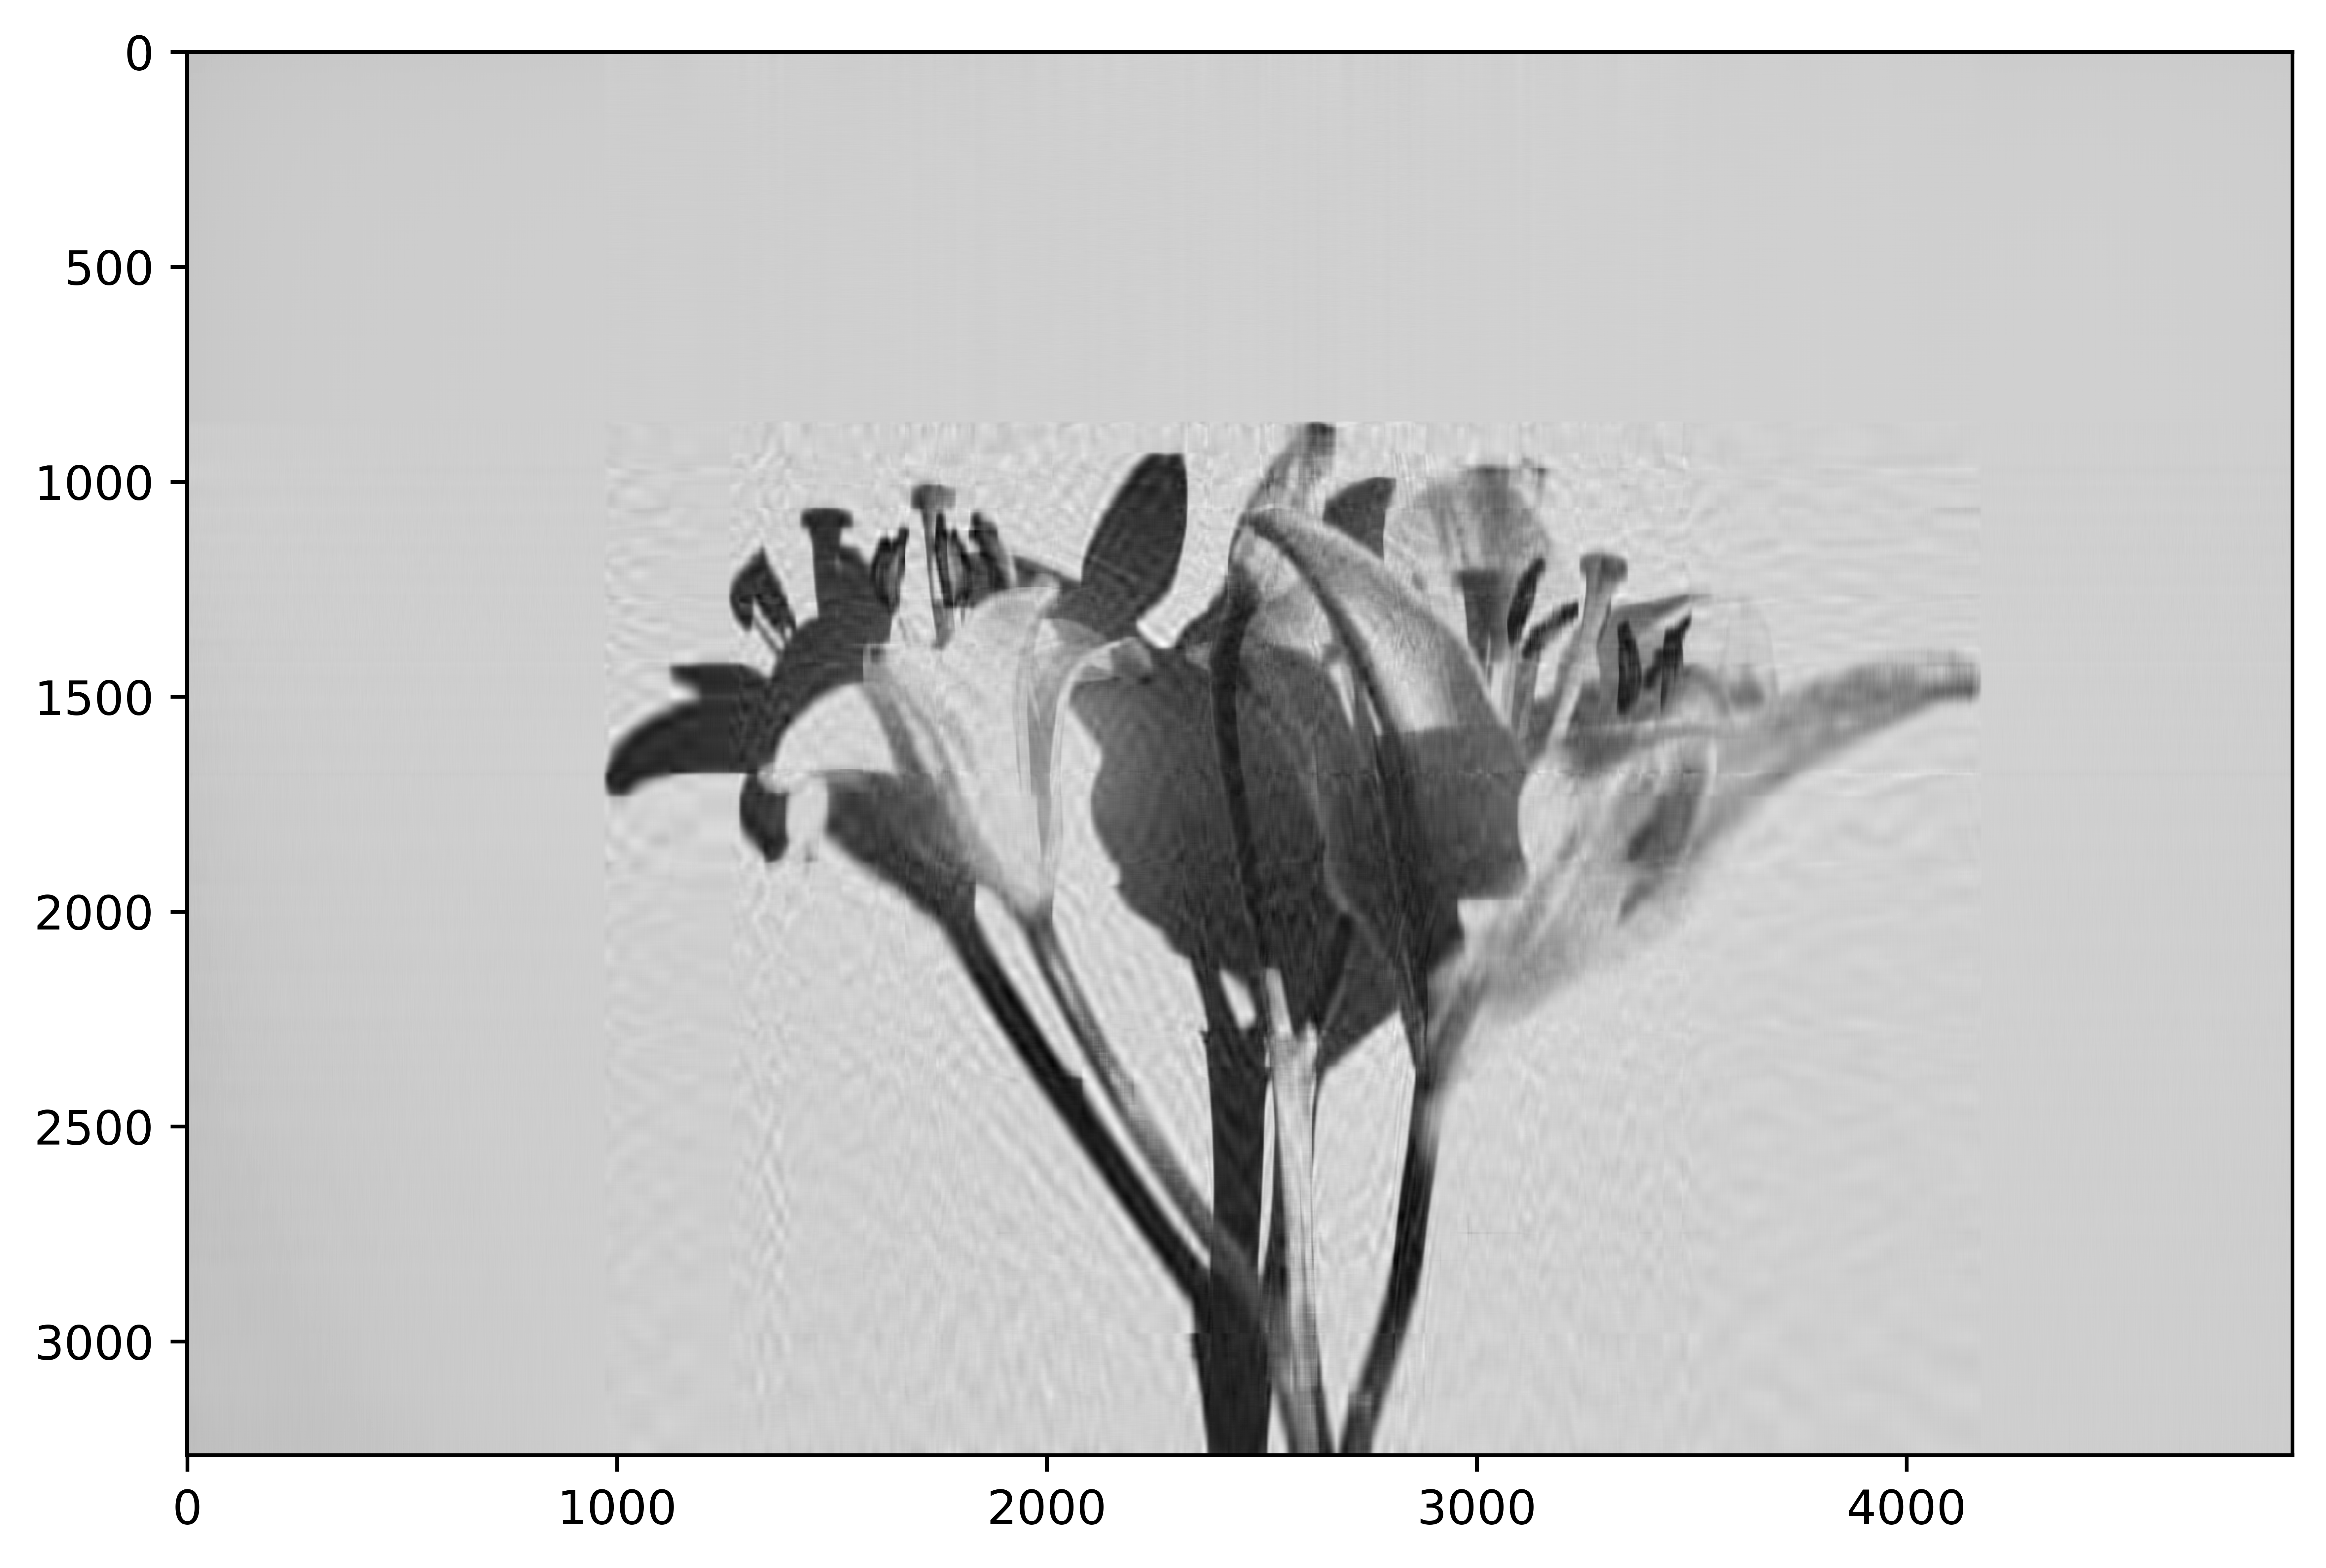

In [54]:
k = input("Number of singular values for compression: ")
k = int(k)

# use only the first k singular values
sigma = np.zeros(img.shape)
s_comp = np.zeros(len(s))
s_comp[:k] = s[:k]
sigma[:len(s_comp), :len(s_comp)] = np.diag(s_comp)

compressed = U @ sigma @ Vt


# display the images
plt.figure(figsize=(8, 6), dpi=1028)
plt.imshow(compressed, cmap="gray")

In [60]:
# approximation error
error = np.linalg.norm(s[k:])/ np.linalg.norm(s)
print("Error: " + str(error))

Error: 0.16341538376183146
